In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

from wordcloud import WordCloud

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import stopwords

In [2]:
data = []
with open('../datasets/SMSSpamCollection','r') as f:
    for line in f.readlines():
        data.append(line[:-1].split('\t'))
        
data = np.array(data)

df = pd.DataFrame({"label" :data[:,0],"message" : data[:,1]})

df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will Ã¼ b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [3]:
df = pd.read_csv('../datasets/SMSSpamCollection',sep = '\t',names=['label','text'])

df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<Axes: xlabel='count', ylabel='label'>

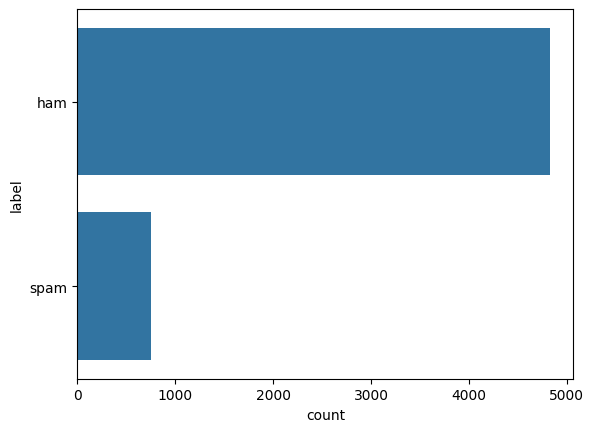

In [4]:
sns.countplot(df['label'])

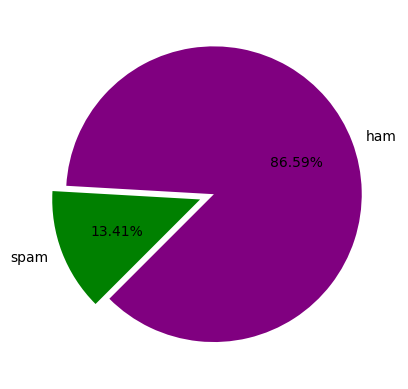

In [5]:
plt.pie(df['label'].value_counts(),labels=['ham','spam'],autopct='%.2f%%',colors=['purple','green'],explode = [0,0.1],startangle=225);

In [6]:
#input variable
x = df['text']

#output variable
y = df['label']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
#function for cleaning the text (steming)

sword = stopwords.words('english')
ps = PorterStemmer()
wnl = WordNetLemmatizer()

def clean_text_stem(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [token for token in tokens1 if token.isalpha()]
    tokens3 = [ps.stem(token) for token in tokens2 if token.lower() not in sword]
    return tokens3

In [9]:
sent = 'Hello friends! How are you? welcome to Python programming'
clean_text_stem(sent)

['hello', 'friend', 'welcom', 'python', 'program']

In [10]:
#function for cleaning the text (lemmetizer )

sword = stopwords.words('english')
ps = PorterStemmer()
wnl = WordNetLemmatizer()

def clean_text_lemmetize(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [token for token in tokens1 if token.isalpha()]
    tokens3 = [token for token in tokens2 if token.lower() not in sword]
    tags = pos_tag(tokens3)
    tokens4 = []
    for word in tags:
        if word[1].startswith('N'):
            tokens4.append(wnl.lemmatize(word[0],pos = 'n'))
        elif word[1].startswith('V'):
            tokens4.append(wnl.lemmatize(word[0],pos = 'v'))
        elif word[1].startswith('J'):
            tokens4.append(wnl.lemmatize(word[0],pos = 'a'))
    return tokens4

In [11]:
sent = 'Hello friends! How are you? welcome to Python programming'
clean_text_lemmetize(sent)

['Hello', 'friends', 'welcome', 'Python', 'programming']

In [12]:
ham = df[df['label'] == 'ham']['text']
spam = df[df['label'] == 'spam']['text']
ham.sum()

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...Ok lar... Joking wif u oni...U dun say so early hor... U c already then say...Nah I don\'t think he goes to usf, he lives around here thoughEven my brother is not like to speak with me. They treat me like aids patent.As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends CallertuneI\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today.I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.I HAVE A DATE ON SUNDAY WITH WILL!!Oh k...i\'m watching here:)Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet.Fine if that\x92s the way u feel. That\x92s the way its g

In [13]:
spam_message = spam.sum()
ham_message = ham.sum()
ham_message

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...Ok lar... Joking wif u oni...U dun say so early hor... U c already then say...Nah I don\'t think he goes to usf, he lives around here thoughEven my brother is not like to speak with me. They treat me like aids patent.As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends CallertuneI\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today.I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.I HAVE A DATE ON SUNDAY WITH WILL!!Oh k...i\'m watching here:)Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet.Fine if that\x92s the way u feel. That\x92s the way its g

In [14]:
len(spam_message),len(ham_message)

(103587, 344903)

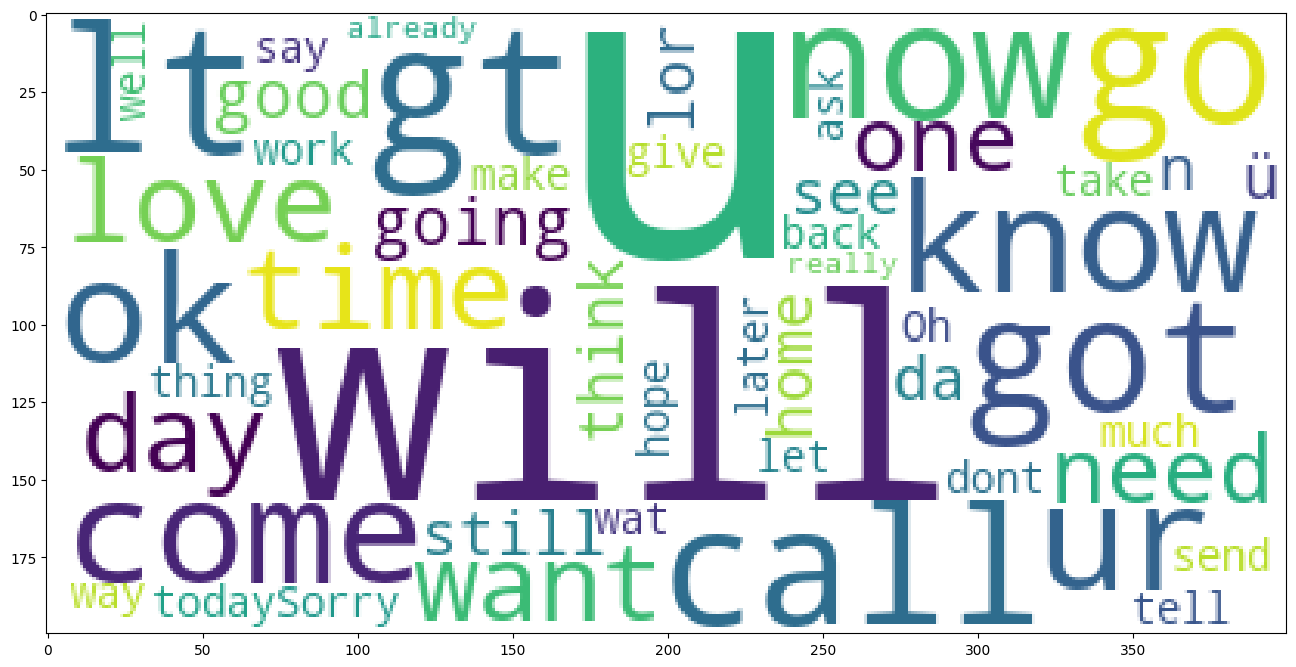

In [15]:
wc_spam = WordCloud(background_color='white',max_words=50).generate(ham_message)
plt.figure(figsize=(16,9))
plt.imshow(wc_spam)

In [16]:
# x.apply(clean_text_stem)

In [17]:
#Vectorization

tfidf = TfidfVectorizer(analyzer=clean_text_stem)
x_vect = tfidf.fit_transform(x)
x_vect.shape

(5572, 5926)

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x_vect,y,random_state=0)

In [19]:
#building model 
#linear kernel

svm = SVC(kernel='linear') #creating model

svm.fit(x_train,y_train) #training model

y_pred = svm.predict(x_test) #prediction 

print(classification_report(y_test,y_pred))
accuracy_score(y_test,y_pred) #evaluation


              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.88      0.93       185

    accuracy                           0.98      1393
   macro avg       0.98      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



0.9827709978463748

In [20]:
#building model 
#linear kernel


svm = SVC(kernel='rbf') #creating model

svm.fit(x_train,y_train) #training model

y_pred = svm.predict(x_test) #prediction 

print(classification_report(y_test,y_pred))
accuracy_score(y_test,y_pred) #evaluation

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       1.00      0.86      0.92       185

    accuracy                           0.98      1393
   macro avg       0.99      0.93      0.96      1393
weighted avg       0.98      0.98      0.98      1393



0.9813352476669059

In [21]:
#building model 
#polynomial kernel


svm = SVC(kernel='poly') #creating model

svm.fit(x_train,y_train) #training model

y_pred = svm.predict(x_test) #prediction 

print(classification_report(y_test,y_pred))
accuracy_score(y_test,y_pred) #evaluation

              precision    recall  f1-score   support

         ham       0.95      1.00      0.97      1208
        spam       1.00      0.62      0.77       185

    accuracy                           0.95      1393
   macro avg       0.97      0.81      0.87      1393
weighted avg       0.95      0.95      0.94      1393



0.949748743718593

In [22]:
#building model 
#sigmoid kernel


svm = SVC(kernel='sigmoid') #creating model

svm.fit(x_train,y_train) #training model

y_pred = svm.predict(x_test) #prediction 

print(classification_report(y_test,y_pred))
accuracy_score(y_test,y_pred) #evaluation

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.98      0.87      0.92       185

    accuracy                           0.98      1393
   macro avg       0.98      0.93      0.95      1393
weighted avg       0.98      0.98      0.98      1393



0.9798994974874372

<h1>Checking for new dataset</h1>

In [23]:

with open('../datasets/sample.csv', 'r') as f:
    test = f.readlines()
    test_vect = tfidf.transform(test)
    preds = svm.predict(test)
preds
   


ValueError: could not convert string to float: 'Ok lar i double check wif da hair dresser already he said wun cut v short. He said will cut until i look nice.,,\n'